In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Notebook inspired by https://towardsdatascience.com/covid-19-infection-in-italy-mathematical-models-and-predictions-7784b4d7dd8d

In [2]:
url = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
df = pd.read_csv(url)

The history saving thread hit an unexpected error (OperationalError('disk I/O error',)).History will not be written to the database.


In [3]:
df

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
0,2020-02-24 18:00:00,ITA,101,26,127,94,221,221,1,7,229,4324
1,2020-02-25 18:00:00,ITA,114,35,150,162,311,90,1,10,322,8623
2,2020-02-26 18:00:00,ITA,128,36,164,221,385,74,3,12,400,9587
3,2020-02-27 18:00:00,ITA,248,56,304,284,588,203,45,17,650,12014
4,2020-02-28 18:00:00,ITA,345,64,409,412,821,233,46,21,888,15695
5,2020-02-29 18:00:00,ITA,401,105,506,543,1049,228,50,29,1128,18661
6,2020-03-01 18:00:00,ITA,639,140,779,798,1577,528,83,34,1694,21127
7,2020-03-02 18:00:00,ITA,742,166,908,927,1835,258,149,52,2036,23345
8,2020-03-03 18:00:00,ITA,1034,229,1263,1000,2263,428,160,79,2502,25856
9,2020-03-04 18:00:00,ITA,1346,295,1641,1065,2706,443,276,107,3089,29837


In [4]:
dfTot = df.loc[:,['data','totale_casi']]
FMT = '%Y-%m-%d %H:%M:%S'
date = dfTot['data']
dfTot['n'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01 00:00:00", FMT)).days  )
dfTot['data'] = date.map(lambda x : datetime.strptime(x, FMT).strftime("%d-%m"))

In [5]:
dfTot

,data,totale_casi,n
0,24-02,229,54
1,25-02,322,55
2,26-02,400,56
3,27-02,650,57
4,28-02,888,58
5,29-02,1128,59
6,01-03,1694,60
7,02-03,2036,61
8,03-03,2502,62
9,04-03,3089,63


In [6]:
x = list(dfTot.iloc[:,2])
y = list(dfTot.iloc[:,1])

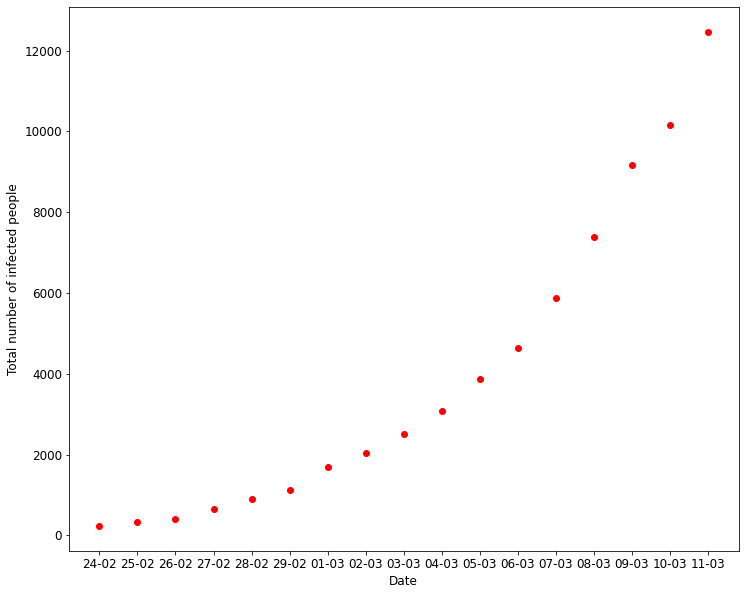

In [7]:
plt.rcParams['figure.figsize'] = [12, 10]
plt.rc('font', size=12)
plt.scatter(dfTot.iloc[:,0],y,label="Real data",color="red")
plt.xlabel("Date")
plt.ylabel("Total number of infected people")
#plt.ylim((min(y)*0.9,c*1.1))
plt.show()

In [8]:
def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

In [9]:
fit = curve_fit(logistic_model,x,y,p0=[2,100,20000])
[a,b,c] = fit[0]

In [10]:
errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]
[e_a,e_b,e_c] = errors

In [11]:
sol = int(fsolve(lambda x : logistic_model(x,a,b,c) - int(c),b))
pred_x = list(range(max(x),sol))

In [12]:
def exponential_model(x,a,b,c):
    return a*np.exp(b*(x-c))

In [13]:
#exp_fit = curve_fit(exponential_model,x,y,p0=[1,1,1])

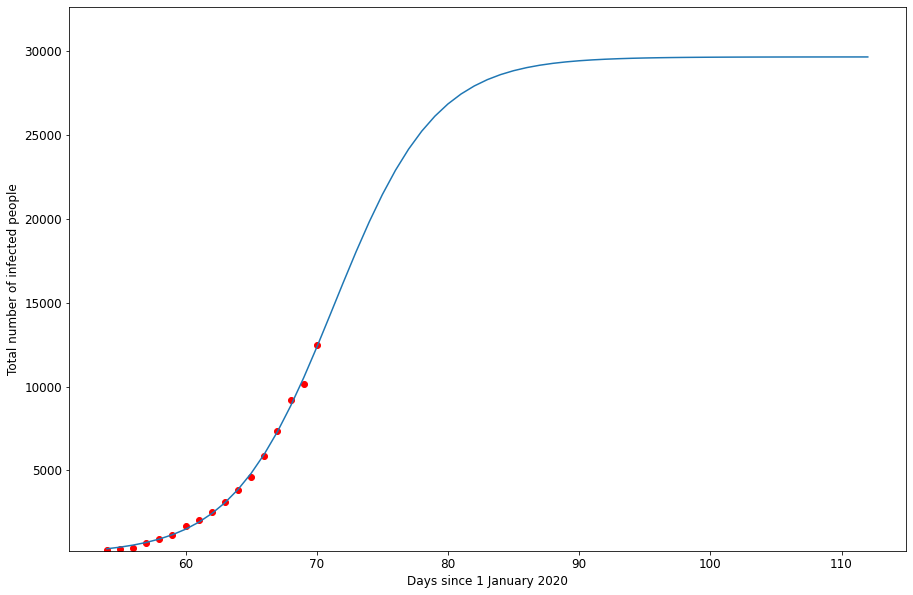

In [14]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.rc('font', size=12)
plt.scatter(x,y,label="Real data",color="red")
# Predicted logistic curve
plt.plot(x+pred_x, [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) 
                    for i in x+pred_x], label="Logistic model" )

plt.xlabel("Days since 1 January 2020")
plt.ylabel("Total number of infected people")
plt.ylim((min(y)*0.9,c*1.1))
plt.show()

In [15]:
"Expected number of infected people " + str(int(c))

'Expected number of infected people 29659'

In [16]:
peak = datetime.strptime("2020-01-01 00:00:00", FMT) +  timedelta(days=round(b))
"Contagion Peak is expected on: " + peak.strftime("%d %b %Y") + " +/- " + str(int(e_b)) +" days"

'Contagion Peak is expected on: 12 Mar 2020 +/- 1 days'

In [17]:
top = datetime.strptime("2020-01-01 00:00:00", FMT) +  timedelta(days=round(sol))
"Expected infection ends on " + top.strftime("%d %b %Y")

'Expected infection ends on 23 Apr 2020'